In [1]:
#SVM
# performing linear algebra 
import numpy as np  
  
# data processing 
import pandas as pd 
  
# visualisation 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [2]:

dataset = pd.read_csv("class C.csv") 
print (dataset.head) 

<bound method NDFrame.head of       satisfaction_level  left  last_evaluation  number_project  \
0                   0.96     0             0.72               3   
1                   0.99     0             0.48               5   
2                   0.51     0             0.52               5   
3                   0.51     0             0.52               5   
4                   0.90     0             0.74               3   
...                  ...   ...              ...             ...   
7494                0.41     1             0.46               2   
7495                0.41     1             0.46               2   
7496                0.41     1             0.46               2   
7497                0.37     0             0.41               2   
7498                0.37     0             0.41               2   

      average_montly_hours  time_spend_company  Work_accident  \
0                      197                   3              0   
1                      202         

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7499 entries, 0 to 7498
Data columns (total 10 columns):
satisfaction_level       7499 non-null float64
left                     7499 non-null int64
last_evaluation          7499 non-null float64
number_project           7499 non-null int64
average_montly_hours     7499 non-null int64
time_spend_company       7499 non-null int64
Work_accident            7499 non-null int64
promotion_last_5years    7499 non-null int64
Department               7499 non-null object
salary                   7499 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 586.0+ KB


In [4]:
dataset.describe()

,satisfaction_level,left,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
count,7499.000000,7499.000000,7499.000000,7499.000000,7499.000000,7499.000000,7499.000000,7499.000000
mean,0.556908,0.233231,0.626460,3.059341,183.157888,3.032138,0.147620,0.042539
std,0.216509,0.422916,0.151505,0.968054,46.396791,1.092986,0.354746,0.201829
min,0.090000,0.000000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.400000,0.000000,0.510000,2.000000,146.000000,2.000000,0.000000,0.000000
50%,0.540000,0.000000,0.580000,3.000000,171.000000,3.000000,0.000000,0.000000
75%,0.720000,0.000000,0.730000,4.000000,219.000000,3.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


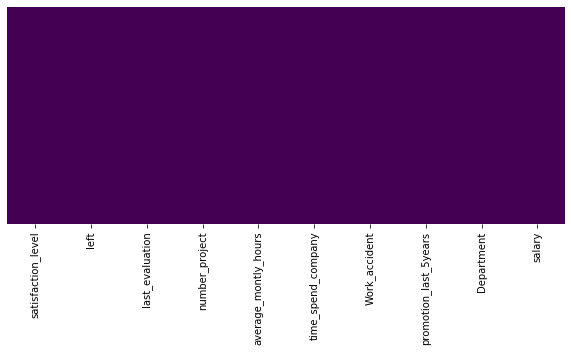

In [5]:
# heatmap to check the missing value 
plt.figure(figsize =(10, 4)) 
sns.heatmap(dataset.isnull(), yticklabels = False, cbar = False, cmap ='viridis')

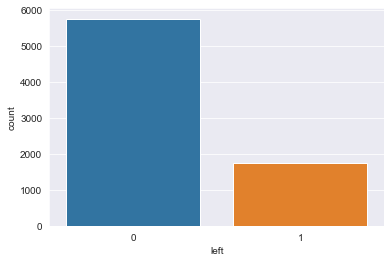

In [6]:
sns.set_style('darkgrid') 
sns.countplot(x ='left', data = dataset) 

In [7]:
len(object_col)

NameError: name 'object_col' is not defined

In [8]:

y = dataset.iloc[:, 1] 
x = dataset 
x.drop('left', axis = 1, inplace = True)

In [9]:
from sklearn.preprocessing import LabelEncoder 
lb = LabelEncoder() 
y = lb.fit_transform(y) 

In [10]:
 
dum_Department = pd.get_dummies(dataset['Department'],  
                                prefix ='Department') 
dum_salary = pd.get_dummies(dataset['salary'],  
                                prefix ='salary') 

# Adding these dummy variable to input X 
X = pd.concat([x, dum_Department,  
               dum_salary], axis = 1) 
# Removing the categorical data 
X.drop(['Department', 'salary'],  
        axis = 1, inplace = True) 
  
print(X.shape) 
print(y.shape) 

(7499, 20)
(7499,)


In [11]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( 
    X, y, test_size = 0.25, random_state = 40)

In [12]:
from sklearn.svm import SVC

In [13]:
model=SVC()

In [14]:
model.fit(X_train,y_train) 

C:\Users\Aynur\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [15]:
predictions=model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix,matthews_corrcoef

In [16]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
print('\n')
print(matthews_corrcoef(y_test,predictions))

[[1390   39]
 [  52  394]]


              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1429
           1       0.91      0.88      0.90       446

    accuracy                           0.95      1875
   macro avg       0.94      0.93      0.93      1875
weighted avg       0.95      0.95      0.95      1875



0.8649474260063654


In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
param_grid={'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [19]:
grid=GridSearchCV(SVC(),param_grid,verbose=3)

In [20]:
grid.fit(X_train,y_train)

C:\Users\Aynur\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.800, total=   2.0s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.800, total=   2.0s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.9s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.798, total=   2.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.938, total=   0.9s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.943, total=   0.9s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.942, total=   0.9s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.867, total=   0.7s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.880, total=   0.7s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.874, total=   0.6s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .

[CV] ..................... C=1000, gamma=1, score=0.974, total=   2.1s
[CV] C=1000, gamma=1 .................................................
[CV] ..................... C=1000, gamma=1, score=0.967, total=   2.1s
[CV] C=1000, gamma=1 .................................................
[CV] ..................... C=1000, gamma=1, score=0.964, total=   2.1s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ................... C=1000, gamma=0.1, score=0.965, total=   0.4s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ................... C=1000, gamma=0.1, score=0.962, total=   0.4s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ................... C=1000, gamma=0.1, score=0.956, total=   0.5s
[CV] C=1000, gamma=0.01 ..............................................
[CV] .................. C=1000, gamma=0.01, score=0.957, total=   1.2s
[CV] C=1000, gamma=0.01 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  1.2min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [21]:
grid.best_params_

{'C': 10, 'gamma': 1}

In [22]:
grid.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [23]:
grid_predictions=grid.predict(X_test)

In [24]:
print(confusion_matrix(y_test,grid_predictions))
print('\n')
print(classification_report(y_test,grid_predictions))
print('\n')
print("MCC               ",matthews_corrcoef(y_test,grid_predictions))

[[1418   11]
 [  35  411]]


              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1429
           1       0.97      0.92      0.95       446

    accuracy                           0.98      1875
   macro avg       0.97      0.96      0.97      1875
weighted avg       0.98      0.98      0.98      1875



MCC                0.9316622182736076
